In [19]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("../src")
import utils

In [20]:
df = utils.load_data()

language
BG    401
PT    400
EN    399
HI    366
RU    133
Name: count, dtype: int64


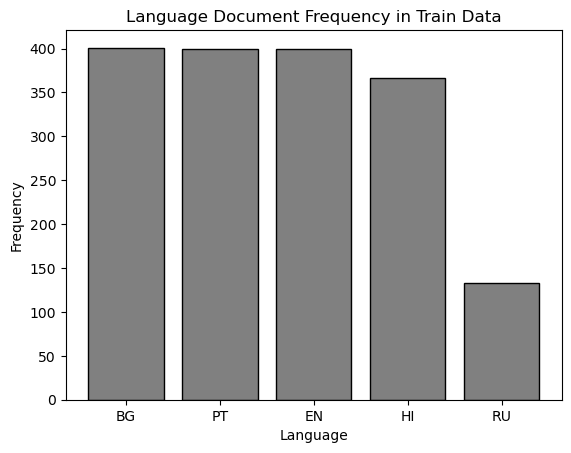

In [21]:
#plot languages?
plt.figure()
plt.title("Language Document Frequency in Train Data")
plt.xlabel("Language")
plt.ylabel("Frequency")
lang_freq = df["language"].value_counts()
print(lang_freq)
plt.bar(lang_freq.index, lang_freq.values, color = "grey", edgecolor = "black")
plt.show()

# plot number of articles per language?


In [22]:
# sum of classes to see how many instances have what class? - split also by language
# check the the counts of the dom_narr and sub_narr arrays - may cause issue due to string format
#  subplots per class?
# how many ukraine texts, how many climate change? 
# Idea: give gpt the full document of describing the classes?
# add a language column to the data, for context
# are there any instances where both CC and URW categories are listed?

#TODO: topic distribution?

sub_mlb = utils.load_sub_mlb()
dom_mlb = utils.load_dom_mlb()

Dom and sub class frequency plots:

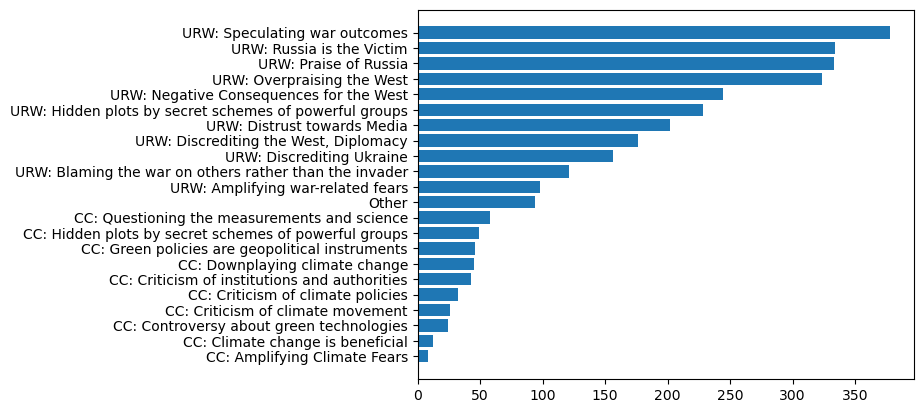

In [23]:
dom_classes_sum = df[dom_mlb.classes_].sum().sort_values(ascending = True)
sub_classes_sum = df[sub_mlb.classes_].sum().sort_values(ascending = True)

plt.figure()
plt.barh(dom_mlb.classes_, dom_classes_sum)
plt.show()

# maybe just show the top 5 of each domain?
# plt.figure(figsize=(10,20))
# plt.barh(sub_mlb.classes_, sub_classes_sum)
# plt.show()

In [24]:
dom_URW_classes = [cl for cl in dom_mlb.classes_ if cl[:3] == "URW"]
dom_CC_classes = [cl for cl in dom_mlb.classes_ if cl[:2] == "CC"]

URW_sum = df[dom_URW_classes].sum().sum() # lower than sub classes, multiple subclasses from dom class selected...
CC_sum = df[dom_CC_classes].sum().sum()
Other_sum = df["Other"].sum()

sums = {
    "Ukraine-Russia War" : URW_sum,
    "Climate Change": CC_sum,
    "Other": Other_sum
}

display(sums)

{'Ukraine-Russia War': 1986, 'Climate Change': 721, 'Other': 324}

In [25]:
sub_URW_classes = [cls for cls in sub_mlb.classes_ if cls[:3] == "URW"]
sub_CC_classes = [cls for cls in sub_mlb.classes_ if cls[:2] == "CC"]

URW_sum = df[sub_URW_classes].sum().sum()
CC_sum = df[sub_CC_classes].sum().sum()
Other_sum = df["Other"].sum()

sums = {
    "Ukraine-Russia War" : URW_sum,
    "Climate Change": CC_sum,
    "Other": Other_sum
}

display(sums)

{'Ukraine-Russia War': 2526, 'Climate Change': 1024, 'Other': 324}

Class distribution:

In [26]:
#Number of sub classes:
print("number of sub-classes: ", len(sub_mlb.classes_))#.columns)
# number of sub urw classes:
print("number of sub urw classes: ", len(sub_URW_classes))
# number of sub CC classes:
print("number of sub cc classes: ", len(sub_CC_classes))

print()

#Number of dominant classes:
print("number of dominant classes: ", len(dom_mlb.classes_))
# number of dom urw classes:
print("number of dom urw classes:", len(dom_URW_classes))
# number of dom CC classes:
print("number of dom cc classes: ", len(dom_CC_classes))

print("The missing class in these is the Other class.")


number of sub-classes:  95
number of sub urw classes:  49
number of sub cc classes:  45

number of dominant classes:  22
number of dom urw classes: 11
number of dom cc classes:  10
The missing class in these is the Other class.


Average amount of classes per instance:

In [27]:
# number of sub & dom classes per instance, including the Other class
df["num_sub_classes"] = df[sub_mlb.classes_].sum(axis = 1)
df["num_dom_classes"] = df[dom_mlb.classes_].sum(axis = 1)
print(np.mean(df["num_sub_classes"]))
print(np.mean(df["num_dom_classes"]))

2.2801648028251913
1.7839905826957034


In [28]:
# average amount of sub and dom classes, if other class is exluded:
no_other_subs = [cls for cls in sub_mlb.classes_ if cls != "Other"]
no_other_doms = [cls for cls in dom_mlb.classes_ if cls != "Other"]

print(np.mean(df.loc[df["Other"] == 0, sub_mlb.classes_].sum(axis = 1)))
print(np.mean(df.loc[df["Other"] == 0, dom_mlb.classes_].sum(axis = 1)))

2.581818181818182
1.9687272727272727


In [29]:
# print(np.mean(df.loc[df[sub_URW_classes]==0,df[sub_CC_classes]].sum(axis=1))) # TODO: dit gaat nog niet helemaal goed
# print(np.mean(df[sub_URW_classes].sum(axis=1)))

Correlaties!

<Axes: >

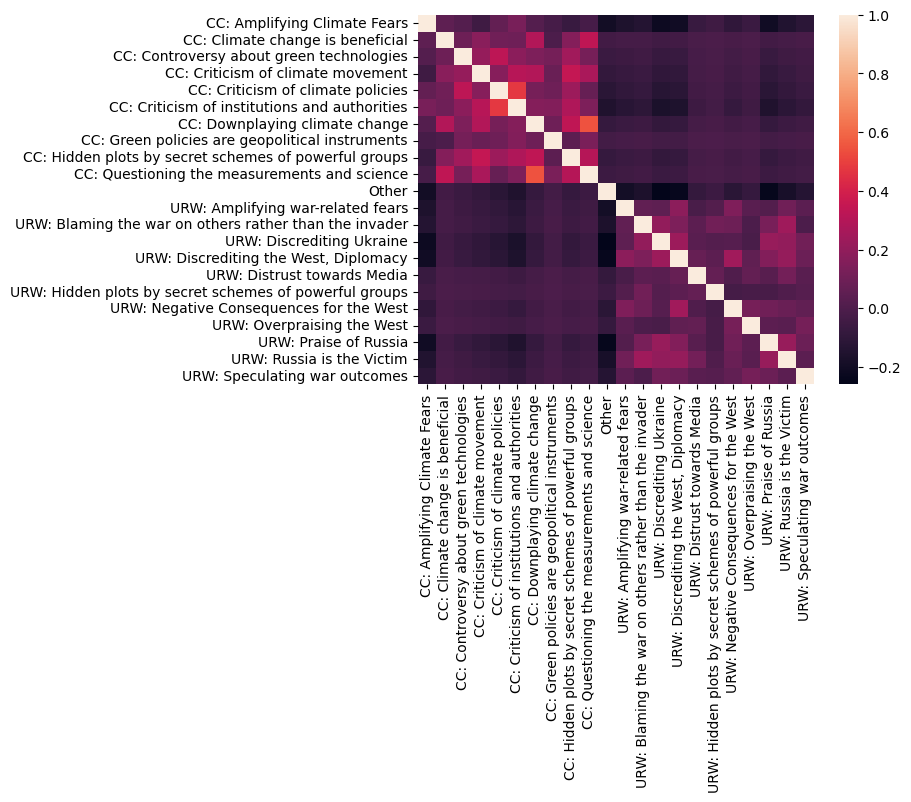

In [30]:
# https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
# Dominant classes correlation heat map
dom_matrix = df[dom_mlb.classes_].corr()
sns.heatmap(dom_matrix)


<Axes: >

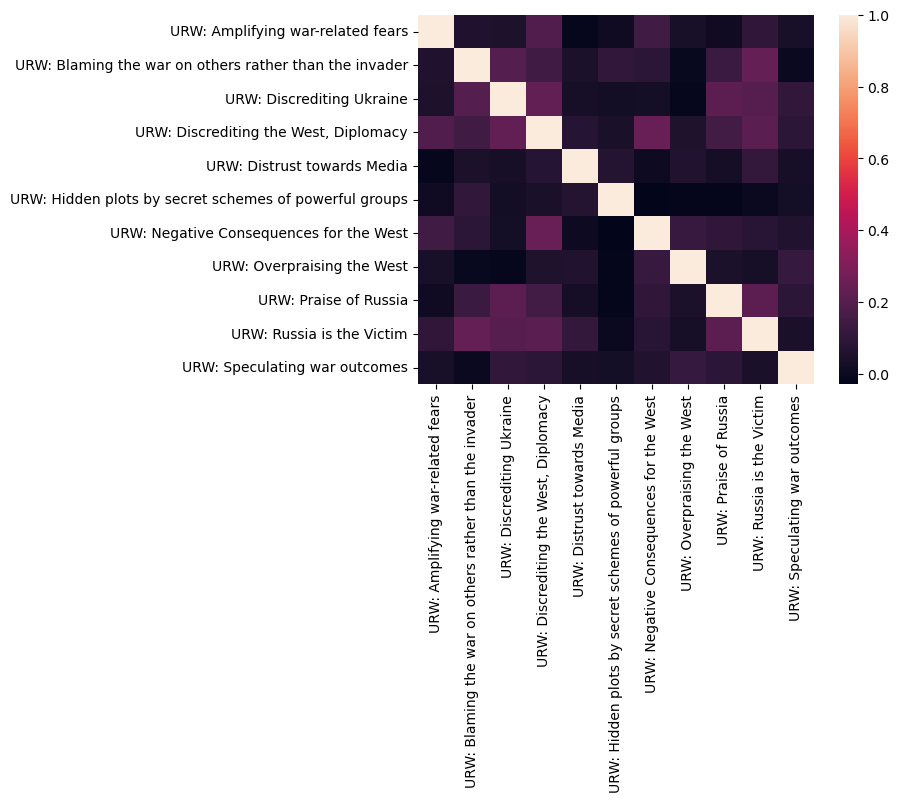

In [31]:

dom_URW_matrix = df[dom_URW_classes].corr()
sns.heatmap(dom_URW_matrix)

<Axes: >

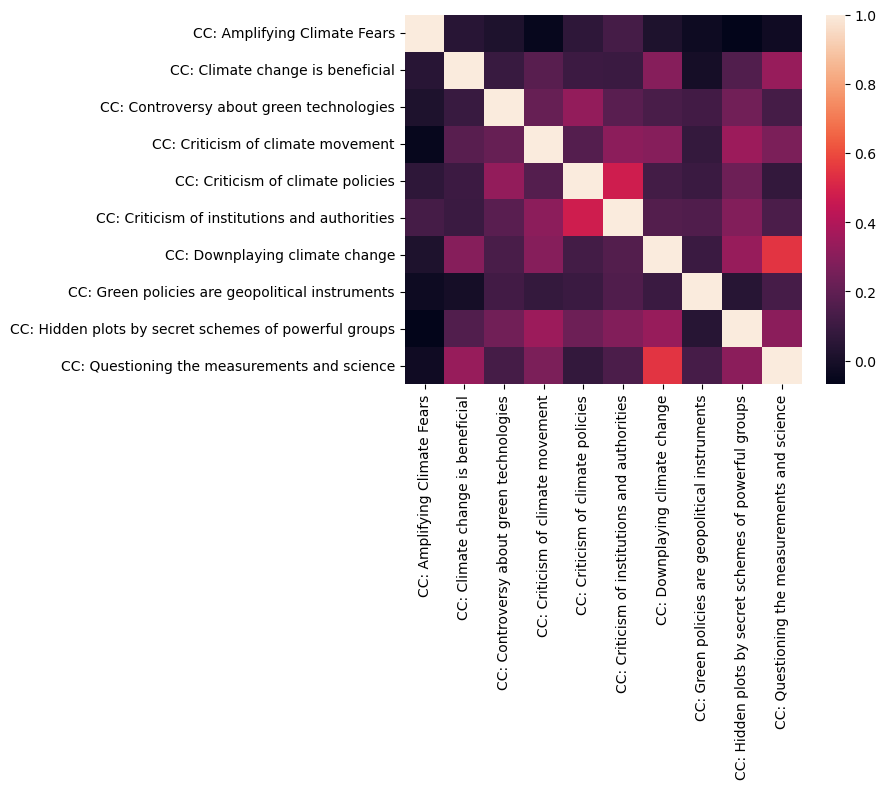

In [32]:

dom_CC_matrix = df[dom_CC_classes].corr()
sns.heatmap(dom_CC_matrix)

In [33]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
sub_CC_matrix = df[sub_CC_classes].corr().unstack().sort_values(ascending = False).drop_duplicates().head(20)
print(sub_CC_matrix)

CC: Amplifying Climate Fears: Amplifying existing fears of global warming                                   CC: Amplifying Climate Fears: Amplifying existing fears of global warming                         1.000000
CC: Controversy about green technologies: Renewable energy is costly                                        CC: Controversy about green technologies: Renewable energy is unreliable                          0.711912
CC: Green policies are geopolitical instruments: Other                                                      CC: Downplaying climate change: Temperature increase does not have significant impact             0.446687
CC: Questioning the measurements and science: Scientific community is unreliable                            CC: Downplaying climate change: CO2 concentrations are too small to have an impact                0.444700
CC: Controversy about green technologies: Renewable energy is dangerous                                     CC: Controversy about green tech

In [34]:
sub_URW_matrix = df[sub_URW_classes].corr().unstack().sort_values(ascending = False).drop_duplicates().head(20)
print(sub_URW_matrix)

URW: Amplifying war-related fears: By continuing the war we risk WWIII                                URW: Amplifying war-related fears: By continuing the war we risk WWIII                 1.000000
URW: Discrediting Ukraine: Other                                                                      URW: Russia is the Victim: Other                                                       0.306565
URW: Discrediting Ukraine: Discrediting Ukrainian military                                            URW: Praise of Russia: Praise of Russian military might                                0.299542
URW: Russia is the Victim: UA is anti-RU extremists                                                   URW: Discrediting Ukraine: Ukraine is associated with nazism                           0.257413
URW: Discrediting the West, Diplomacy: Other                                                          URW: Negative Consequences for the West: Other                                         0.251821
URW: Overp

In [35]:
def derive_topics(row):
    
    if row[dom_CC_classes].sum() >= 1:
        return "CC"
    if row[dom_URW_classes].sum() >= 1:
        return "URW"
    
    return "Other"

In [36]:
df["topic"] = df.apply(derive_topics, axis=1)

topic  language
CC     BG          110
       EN          103
       HI           40
       PT          165
       RU            0
Other  BG           30
       EN          169
       HI           98
       PT           27
       RU            0
URW    BG          261
       EN          127
       HI          228
       PT          208
       RU          133
dtype: int64
<class 'str'>
<class 'str'>
[110 103  40 165   0]


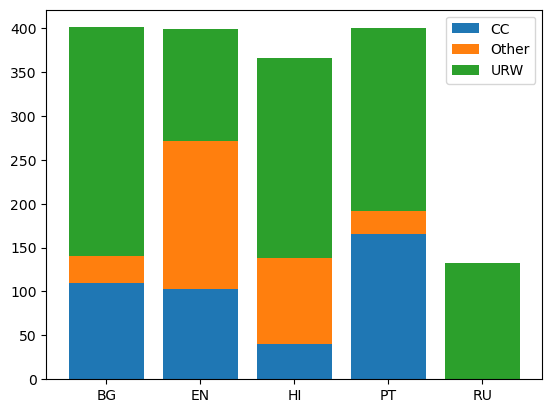

In [117]:
topics = df.groupby(['topic', 'language']).size()
languages = ['BG', 'EN', 'HI', 'PT', 'RU']
topics.loc[('CC','RU')] = 0
topics.loc[('Other','RU')] = 0
topics.sort_index(inplace=True)
print(topics)

fig,ax = plt.subplots()
bottom = np.zeros(5)

print(type(topics["CC"].index[0]))
print(type(languages[0]))
print(topics["CC"].values)

ax.bar(topics["CC"].index,topics["CC"].values,bottom=bottom,label="CC")
bottom+=topics["CC"].values
ax.bar(topics["Other"].index, topics["Other"].values, bottom=bottom, label="Other")
bottom+=topics["Other"].values
ax.bar(topics["URW"].index, topics["URW"].values, bottom=bottom, label="URW")
ax.legend()


# plt.bar(topics["language"])
# plt.show()

In [38]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'text', 'language', 'dom_narr', 'sub_narr',
       'CC: Amplifying Climate Fears', 'CC: Climate change is beneficial',
       'CC: Controversy about green technologies',
       'CC: Criticism of climate movement',
       ...
       'URW: Russia is the Victim: The West is russophobic',
       'URW: Russia is the Victim: UA is anti-RU extremists',
       'URW: Speculating war outcomes: Other',
       'URW: Speculating war outcomes: Russian army is collapsing',
       'URW: Speculating war outcomes: Russian army will lose all the occupied territories',
       'URW: Speculating war outcomes: Ukrainian army is collapsing',
       'translated_text', 'num_sub_classes', 'num_dom_classes', 'topic'],
      dtype='object', length=127)
